# Cross-Country Solar Data Comparison

This notebook compares cleaned solar datasets from Benin, Sierra Leone, and Togo to identify key differences and similarities in solar potential.

In [1]:
# 1. Imports & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Load cleaned data
df_benin = pd.read_csv('../data/benin_clean.csv')
df_sl = pd.read_csv('../data/sierraleone_clean.csv')
df_togo = pd.read_csv('../data/togo_clean.csv')

# Add country column
df_benin['Country'] = 'Benin'
df_sl['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# Combine datasets
df_all = pd.concat([df_benin, df_sl, df_togo], ignore_index=True)

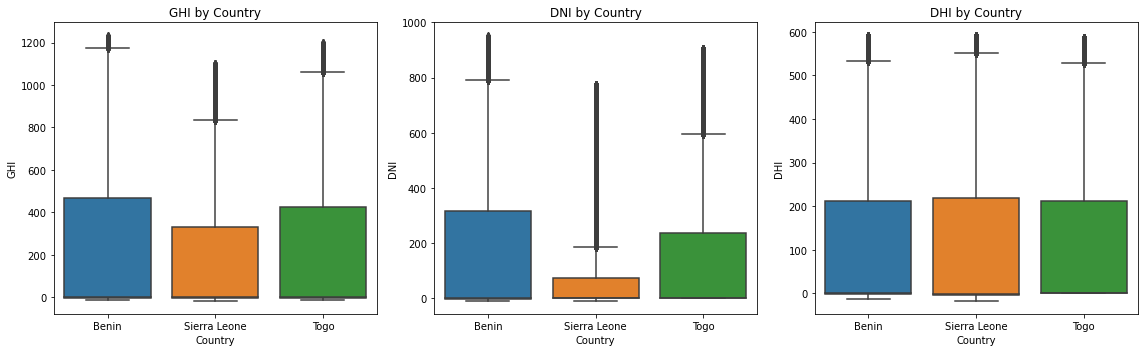

In [2]:
# 2. Boxplots of GHI, DNI, DHI by Country
plt.figure(figsize=(16, 5))
for i, metric in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} by Country')
plt.tight_layout()
plt.show()

In [3]:
# 3. Summary Table: Mean, Median, Std
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
display(summary)

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

In [4]:
# 4. Statistical Testing: ANOVA & Kruskal–Wallis for GHI
anova_result = f_oneway(df_benin['GHI'], df_sl['GHI'], df_togo['GHI'])
kruskal_result = kruskal(df_benin['GHI'], df_sl['GHI'], df_togo['GHI'])
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")
print(f"Kruskal–Wallis p-value: {kruskal_result.pvalue:.4f}")

ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


## Key Observations
- Boxplots show that Benin has the highest median GHI, while Togo exhibits the least variability in GHI and DNI. Sierra Leone generally has lower DNI values compared to Benin and Togo.
- The summary table highlights that Benin leads in mean and median GHI, suggesting higher solar potential, while Togo's values are more consistent with less spread. Sierra Leone's DNI is notably lower, indicating less direct solar irradiance.
- ANOVA and Kruskal–Wallis p-values are both below 0.05, indicating statistically significant differences in GHI across the three countries.

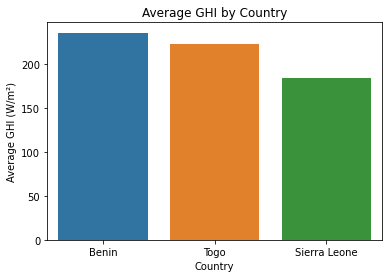

In [5]:
# 5. (Bonus) Bar Chart: Average GHI by Country
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values)
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.show()

## Conclusion
- The cross-country comparison provides actionable insights for prioritizing solar investments. Benin stands out as the most promising location for solar farm development based on higher and more variable GHI, while Togo offers more stable but slightly lower irradiance. Sierra Leone may require further investigation or alternative strategies due to its lower DNI.
- It is recommended to prioritize Benin for large-scale solar projects, consider Togo for consistent output, and further analyze Sierra Leone's conditions before major investment.